In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

### Import the Indian COVID-19 data

In [2]:
covid_df = pd.read_csv('cleaned_full_data.csv')
pd.set_option('display.max_rows', 1000)

filt = covid_df.country=='India'
ind_covid_df = covid_df.loc[filt].copy()

In [3]:
ind_covid_df.head(400)

date country  new_cases  new_deaths  total_cases  total_deaths
32110  2020-01-30   India          1           0            1             0
32111  2020-01-31   India          0           0            1             0
32112  2020-02-01   India          0           0            1             0
32113  2020-02-02   India          1           0            2             0
32114  2020-02-03   India          1           0            3             0
32115  2020-02-04   India          0           0            3             0
32116  2020-02-05   India          0           0            3             0
32117  2020-02-06   India          0           0            3             0
32118  2020-02-07   India          0           0            3             0
32119  2020-02-08   India          0           0            3             0
32120  2020-02-09   India          0           0            3             0
32121  2020-02-10   India          0           0            3             0
32122  2020-02-11   India          0           0            3             0
32123  2020-02-12   India          0           0            3             0
32124  2020-02-13   India          0           0            3             0
32125  2020-02-14   India          0           0            3             0
32126  2020-02-15   India          0           0            3             0
32127  2020-02-16   India          0           0            3             0
32128  2020-02-17   India          0           0            3             0
32129  2020-02-18   India          0           0            3             0
32130  2020-02-19   India          0           0            3             0
32131  2020-02-20   India          0           0            3             0
32132  2020-02-21   India          0           0            3             0
32133  2020-02-22   India          0           0            3             0
32134  2020-02-23   India          0           0            3             0
32135  2020-02-24   India          0           0            3             0
32136  2020-02-25   India          0           0            3             0
32137  2020-02-26   India          0           0            3             0
32138  2020-02-27   India          0           0            3             0
32139  2020-02-28   India          0           0            3             0
32140  2020-02-29   India          0           0            3             0
32141  2020-03-01   India          0           0            3             0
32142  2020-03-02   India          2           0            5             0
32143  2020-03-03   India          0           0            5             0
32144  2020-03-04   India         23           0           28             0
32145  2020-03-05   India          2           0           30             0
32146  2020-03-06   India          1           0           31             0
32147  2020-03-07   India          3           0           34             0
32148  2020-03-08   India          5           0           39             0
32149  2020-03-09   India          4           0           43             0
32150  2020-03-10   India         13           0           56             0
32151  2020-03-11   India          6           1           62             1
32152  2020-03-12   India         11           0           73             1
32153  2020-03-13   India          9           1           82             2
32154  2020-03-14   India         20           0          102             2
32155  2020-03-15   India         11           0          113             2
32156  2020-03-16   India          6           0          119             2
32157  2020-03-17   India         23           1          142             3
32158  2020-03-18   India         14           0          156             3
32159  2020-03-19   India         38           1          194             4
32160  2020-03-20   India         50           1          244             5
32161  2020-03-21   India         86          -1          330

In [4]:
ind_covid_df.shape

(435, 6)

## Format Date column

In [5]:
ind_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 32110 to 32544
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          435 non-null    object
 1   country       435 non-null    object
 2   new_cases     435 non-null    int64 
 3   new_deaths    435 non-null    int64 
 4   total_cases   435 non-null    int64 
 5   total_deaths  435 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 23.8+ KB


In [6]:
ind_covid_df['date'] = pd.to_datetime(ind_covid_df['date'],dayfirst=True)

In [7]:
ind_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 32110 to 32544
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          435 non-null    datetime64[ns]
 1   country       435 non-null    object        
 2   new_cases     435 non-null    int64         
 3   new_deaths    435 non-null    int64         
 4   total_cases   435 non-null    int64         
 5   total_deaths  435 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 23.8+ KB


In [8]:
ind_covid_df.sort_values('date', inplace=True)

### Set date column as index

In [9]:
ind_covid_df = ind_covid_df.set_index(['date'])

In [10]:
ind_covid_df.drop('country', axis='columns', inplace = True)

## Visualizations

In [11]:
ind_covid_df.tail()

new_cases  new_deaths  total_cases  total_deaths
date                                                        
2021-04-04     103558         478     12589067        165101
2021-04-05      96982         446     12686049        165547
2021-04-06     115736         630     12801785        166177
2021-04-07     126789         685     12928574        166862
2021-04-08     131968         780     13060542        167642

In [12]:
total_cases = ind_covid_df['total_cases']
total_cases

date
2020-01-30           1
2020-01-31           1
2020-02-01           1
2020-02-02           2
2020-02-03           3
2020-02-04           3
2020-02-05           3
2020-02-06           3
2020-02-07           3
2020-02-08           3
2020-02-09           3
2020-02-10           3
2020-02-11           3
2020-02-12           3
2020-02-13           3
2020-02-14           3
2020-02-15           3
2020-02-16           3
2020-02-17           3
2020-02-18           3
2020-02-19           3
2020-02-20           3
2020-02-21           3
2020-02-22           3
2020-02-23           3
2020-02-24           3
2020-02-25           3
2020-02-26           3
2020-02-27           3
2020-02-28           3
2020-02-29           3
2020-03-01           3
2020-03-02           5
2020-03-03           5
2020-03-04          28
2020-03-05          30
2020-03-06          31
2020-03-07          34
2020-03-08          39
2020-03-09          43
2020-03-10          56
2020-03-11          62
2020-03-12          73
2020-0

In [13]:
total_deaths = ind_covid_df['total_deaths']
total_deaths

date
2020-01-30         0
2020-01-31         0
2020-02-01         0
2020-02-02         0
2020-02-03         0
2020-02-04         0
2020-02-05         0
2020-02-06         0
2020-02-07         0
2020-02-08         0
2020-02-09         0
2020-02-10         0
2020-02-11         0
2020-02-12         0
2020-02-13         0
2020-02-14         0
2020-02-15         0
2020-02-16         0
2020-02-17         0
2020-02-18         0
2020-02-19         0
2020-02-20         0
2020-02-21         0
2020-02-22         0
2020-02-23         0
2020-02-24         0
2020-02-25         0
2020-02-26         0
2020-02-27         0
2020-02-28         0
2020-02-29         0
2020-03-01         0
2020-03-02         0
2020-03-03         0
2020-03-04         0
2020-03-05         0
2020-03-06         0
2020-03-07         0
2020-03-08         0
2020-03-09         0
2020-03-10         0
2020-03-11         1
2020-03-12         1
2020-03-13         2
2020-03-14         2
2020-03-15         2
2020-03-16         2
2020-03-

Text(0.5, 0.98, 'Total Cases by Time')

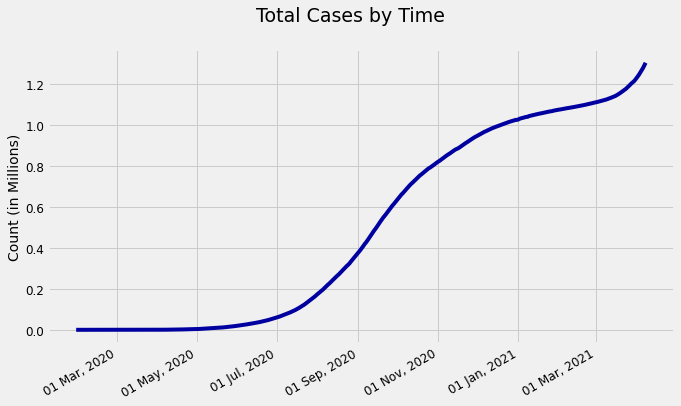

In [14]:
plt.style.use('fivethirtyeight')
# total_cases.plot(figsize=(10,6))
plt.figure(figsize=(10,6))
plt.plot(total_cases.index, total_cases.values/10**7, color='#0000a0')
# plt.plot(total_deaths.index, total_deaths.values, linewidth=1)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.xlabel('')
plt.ylabel('Count (in Millions)',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.suptitle('Total Cases by Time', fontsize=19)

`The line plot shows that exponential rise till November-2020, after that it seemed that cases are about to saturate, but it again began to rise exponentially from March-2021`

In [15]:
total_deaths = ind_covid_df['total_deaths']
total_deaths

date
2020-01-30         0
2020-01-31         0
2020-02-01         0
2020-02-02         0
2020-02-03         0
2020-02-04         0
2020-02-05         0
2020-02-06         0
2020-02-07         0
2020-02-08         0
2020-02-09         0
2020-02-10         0
2020-02-11         0
2020-02-12         0
2020-02-13         0
2020-02-14         0
2020-02-15         0
2020-02-16         0
2020-02-17         0
2020-02-18         0
2020-02-19         0
2020-02-20         0
2020-02-21         0
2020-02-22         0
2020-02-23         0
2020-02-24         0
2020-02-25         0
2020-02-26         0
2020-02-27         0
2020-02-28         0
2020-02-29         0
2020-03-01         0
2020-03-02         0
2020-03-03         0
2020-03-04         0
2020-03-05         0
2020-03-06         0
2020-03-07         0
2020-03-08         0
2020-03-09         0
2020-03-10         0
2020-03-11         1
2020-03-12         1
2020-03-13         2
2020-03-14         2
2020-03-15         2
2020-03-16         2
2020-03-

Text(0.5, 0.98, 'Total Deaths by Time')

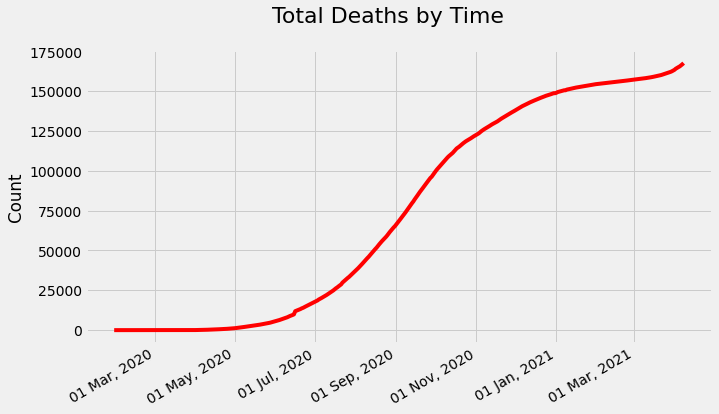

In [16]:
plt.figure(figsize=(10,6))
plt.plot(total_deaths.index, total_deaths.values, color='red')

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Count')
plt.suptitle('Total Deaths by Time', fontsize=22)

In [17]:
new_cases = ind_covid_df['new_cases']
new_cases

date
2020-01-30         1
2020-01-31         0
2020-02-01         0
2020-02-02         1
2020-02-03         1
2020-02-04         0
2020-02-05         0
2020-02-06         0
2020-02-07         0
2020-02-08         0
2020-02-09         0
2020-02-10         0
2020-02-11         0
2020-02-12         0
2020-02-13         0
2020-02-14         0
2020-02-15         0
2020-02-16         0
2020-02-17         0
2020-02-18         0
2020-02-19         0
2020-02-20         0
2020-02-21         0
2020-02-22         0
2020-02-23         0
2020-02-24         0
2020-02-25         0
2020-02-26         0
2020-02-27         0
2020-02-28         0
2020-02-29         0
2020-03-01         0
2020-03-02         2
2020-03-03         0
2020-03-04        23
2020-03-05         2
2020-03-06         1
2020-03-07         3
2020-03-08         5
2020-03-09         4
2020-03-10        13
2020-03-11         6
2020-03-12        11
2020-03-13         9
2020-03-14        20
2020-03-15        11
2020-03-16         6
2020-03-

In [18]:
new_deaths = ind_covid_df['new_deaths']
new_deaths

date
2020-01-30       0
2020-01-31       0
2020-02-01       0
2020-02-02       0
2020-02-03       0
2020-02-04       0
2020-02-05       0
2020-02-06       0
2020-02-07       0
2020-02-08       0
2020-02-09       0
2020-02-10       0
2020-02-11       0
2020-02-12       0
2020-02-13       0
2020-02-14       0
2020-02-15       0
2020-02-16       0
2020-02-17       0
2020-02-18       0
2020-02-19       0
2020-02-20       0
2020-02-21       0
2020-02-22       0
2020-02-23       0
2020-02-24       0
2020-02-25       0
2020-02-26       0
2020-02-27       0
2020-02-28       0
2020-02-29       0
2020-03-01       0
2020-03-02       0
2020-03-03       0
2020-03-04       0
2020-03-05       0
2020-03-06       0
2020-03-07       0
2020-03-08       0
2020-03-09       0
2020-03-10       0
2020-03-11       1
2020-03-12       0
2020-03-13       1
2020-03-14       0
2020-03-15       0
2020-03-16       0
2020-03-17       1
2020-03-18       0
2020-03-19       1
2020-03-20       1
2020-03-21      -1
2020-03

Text(0.5, 0.98, 'Daily New Cases by time')

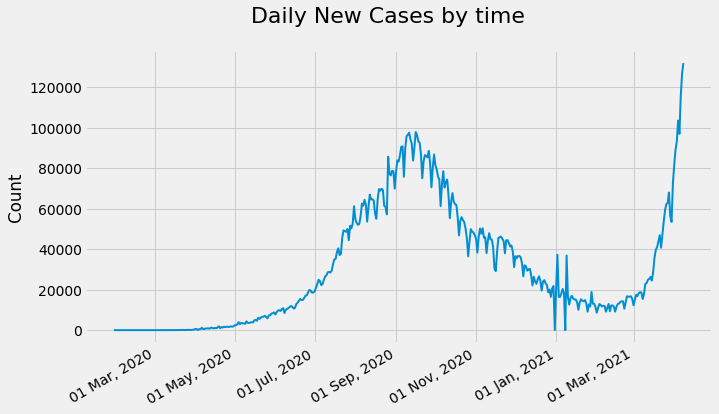

In [19]:
plt.figure(figsize=(10,6))
plt.plot(new_cases.index, new_cases.values,'-', linewidth=2)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Count')
plt.suptitle('Daily New Cases by time',fontsize=22)

`COVID-19 cases rised exponentially from March to September end, which took about 7 months, and got its first maxima of one Lakh new cases a day.`

`Then cases began to decline from October-2020 till the end of the month February-2021 which was a good sign.`

`But then suddenly, cases began to increase at much higher rate than before` 

Text(0.5, 0.98, 'Daily New Deaths by time')

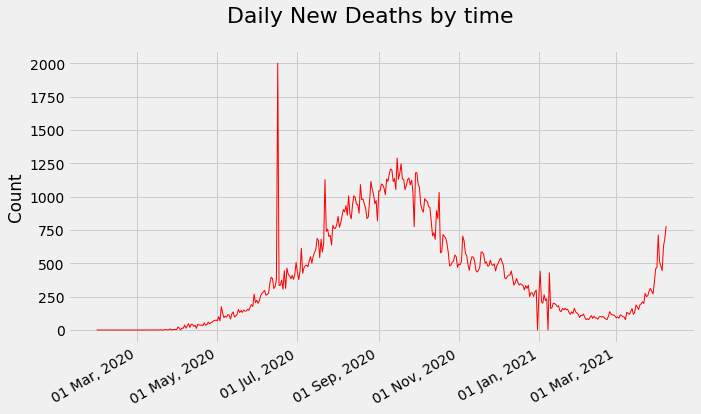

In [20]:
plt.figure(figsize=(10,6))
plt.plot(new_deaths.index, new_deaths.values,'-r', linewidth=1)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Count')
plt.suptitle('Daily New Deaths by time',fontsize=22)

`Above plot depicts that their were large no. of deaths in August, September and October months. `

`Sudden spike of deaths was seen in mid-June and July month`

`Similar trend of deaths is seen as of new cases`

### Let us see if their is any correlation between new cases and new deaths on daily basis

Text(0, 0.5, 'New Deaths')

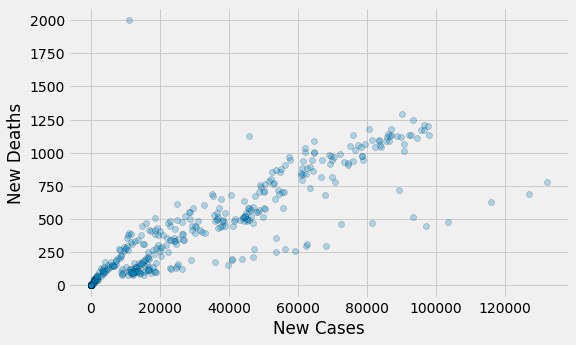

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(new_cases, new_deaths, edgecolor='black', alpha=.3)
plt.xlabel('New Cases')
plt.ylabel('New Deaths')

`The Scatterplot shows that Daily New deaths are linearly correlated with new cases on daily basis.
Their is positive, strong relation between the two, as more points overlapp to form a line `

`i.e. Deaths occuring each day depends on the fresh Covid cases on that day. More the no. of cases are found more deaths will occur`

`From above plots we can conclude, that if we could stop or supress the fresh Covid cases, then their would be less deaths`

## Monthly Analysis

In [22]:
monthly_new_cases = ind_covid_df.loc['2020-02-01': , 'new_cases'].resample('M').sum()
monthly_new_cases

date
2020-02-29          2
2020-03-31       1394
2020-04-30      33466
2020-05-31     155746
2020-06-30     394872
2020-07-31    1110507
2020-08-31    1995178
2020-09-30    2621418
2020-10-31    1871498
2020-11-30    1278727
2020-12-31     803865
2021-01-31     490936
2021-02-28     354631
2021-03-31    1109424
2021-04-30     838877
Freq: M, Name: new_cases, dtype: int64

Text(0.5, 0.98, 'Monthly new cases')

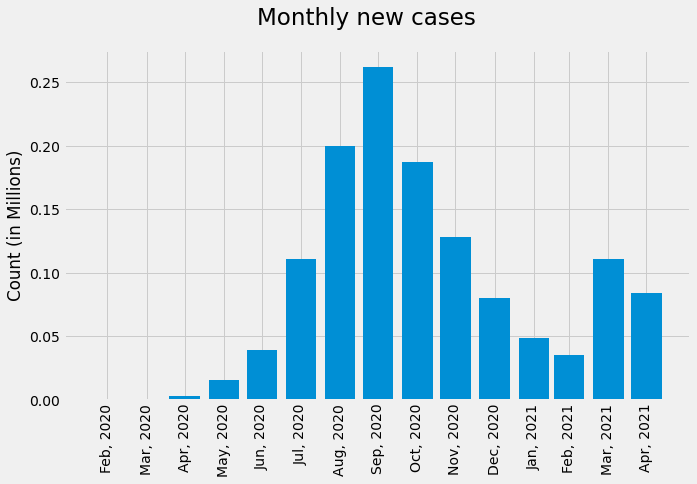

In [23]:
# plt.hist(monthly_new_cases.values, bin=len)
plt.figure(figsize=(10,6))
# monthly_new_cases.plot.bar(width=1, edgecolor='black')
plots = plt.bar(monthly_new_cases.index, monthly_new_cases.values/10**7, width=24)
# plt.gcf().autofmt_xdate()


plt.xticks(monthly_new_cases.index ,rotation=90)

date_format = mpl_dates.DateFormatter('%b, %Y')
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(18))
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Count (in Millions)')
plt.suptitle('Monthly new cases', fontsize=23)


`From above bar chart of Monthwise new cases, Highest cases were recorded in the month of September-2020`

In [24]:
monthly_deaths = ind_covid_df.loc['2020-02-01': , 'new_deaths'].resample('M').sum()
monthly_deaths

date
2020-02-29        0
2020-03-31       35
2020-04-30     1119
2020-05-31     4254
2020-06-30    11992
2020-07-31    19111
2020-08-31    28777
2020-09-30    33390
2020-10-31    23433
2020-11-30    15510
2020-12-31    11117
2021-01-31     5654
2021-02-28     2765
2021-03-31     5770
2021-04-30     4715
Freq: M, Name: new_deaths, dtype: int64

Text(0.5, 0.98, 'Monthly Deaths')

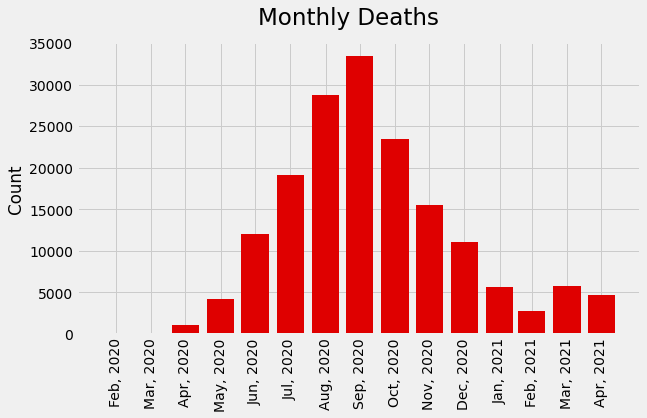

In [25]:
plt.figure(figsize=(9,5))
plt.bar(monthly_deaths.index, monthly_deaths.values, width=24, color='#df0000')

plt.xticks(monthly_deaths.index ,rotation=90)

date_format = mpl_dates.DateFormatter('%b, %Y')

plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Count')
plt.suptitle('Monthly Deaths', fontsize=23)

`Large amount of deaths happened in the August, September and October 2020`

## Vaccination Progress

In [26]:
vac_df = pd.read_csv('cleaned_vaccinations.csv')
vac_df

country        date  total_vaccinations  \
0     Afghanistan  2021-02-22                   0   
1     Afghanistan  2021-02-23                   0   
2     Afghanistan  2021-02-24                   0   
3     Afghanistan  2021-02-25                   0   
4     Afghanistan  2021-02-26                   0   
...           ...         ...                 ...   
9949     Zimbabwe  2021-04-02              124753   
9950     Zimbabwe  2021-04-03              132915   
9951     Zimbabwe  2021-04-04              138900   
9952     Zimbabwe  2021-04-05              145510   
9953     Zimbabwe  2021-04-06              162633   

      people_vaccinated_only_1st_dose  people_fully_vaccinated  \
0                                   0                        0   
1                                   0                        0   
2                                   0                        0   
3                                   0                        0   
4                                   0                        0   
...                               ...                      ...   
9949                           103815                    20938   
9950                           111588                    21327   
9951                           117297                    21603   
9952                           123454                    22056   
9953                           139133                    23500   

      daily_vaccinations  daily_vaccinations_avgd  %_people_vaccinated  \
0                      0                        0                 0.00   
1                      0                     1367                 0.00   
2                      0                     1367                 0.00   
3                      0                     1367                 0.00   
4                      0                     1367                 0.00   
...                  ...                      ...                  ...   
9949               19446                     8156                 0.84   
9950                8162                     8498                 0.89   
9951                5985                     8537                 0.93   
9952                6610                     9129                 0.98   
9953               17123                    10967                 1.09   

      %_people_vaccinated_only_1st_dose  %_people_fully_vaccinated  \
0                                  0.00                       0.00   
1                                  0.00                       0.00   
2                                  0.00                       0.00   
3                                  0.00                       0.00   
4                                  0.00                       0.00   
...                                 ...                        ...   
9949                               0.70                       0.14   
9950                               0.75                       0.14   
9951                               0.79                       0.14   
9952                               0.83                       0.15   
9953                               0.94                       0.15   

                vaccines  
0     Oxford/AstraZeneca  
1     Oxford/AstraZeneca  
2     Oxford/AstraZeneca  
3     Oxford/AstraZeneca  
4     Oxford/AstraZeneca  
...                  ...  
9949   Sinopharm/Beijing  
9950   Sinopharm/Beijing  
9951   Sinopharm/Beijing  
9952   Sinopharm/Beijing  
9953   Sinopharm/Beijing  

[9954 rows x 11 columns]

In [27]:
filt = vac_df.country=='India'
ind_vac_df = vac_df.loc[filt].copy()
ind_vac_df

country        date  total_vaccinations  people_vaccinated_only_1st_dose  \
4194   India  2021-01-15                   0                                0   
4195   India  2021-01-16              191181                           191181   
4196   India  2021-01-17              224301                           224301   
4197   India  2021-01-18              454049                           454049   
4198   India  2021-01-19              674835                           674835   
4199   India  2021-01-20              806484                           806484   
4200   India  2021-01-21             1043534                          1043534   
4201   India  2021-01-22             1390592                          1390592   
4202   India  2021-01-23             1582201                          1582201   
4203   India  2021-01-24             1615504                          1615504   
4204   India  2021-01-25             2023809                          2023809   
4205   India  2021-01-26             2029480                          2029480   
4206   India  2021-01-27             2355979                          2355979   
4207   India  2021-01-28             2928053                          2928053   
4208   India  2021-01-29             3500027                          3500027   
4209   India  2021-01-30             3744334                          3744334   
4210   India  2021-01-31             3758843                          3758843   
4211   India  2021-02-01             3950156                          3950156   
4212   India  2021-02-02             4138918                          4138918   
4213   India  2021-02-03             4449552                          4449552   
4214   India  2021-02-04             4959445                          4959445   
4215   India  2021-02-05             5416849                          5416849   
4216   India  2021-02-06             5775322                          5775322   
4217   India  2021-02-07             5812362                          5812362   
4218   India  2021-02-08             6259008                          6259008   
4219   India  2021-02-09             6611561                          6611561   
4220   India  2021-02-10             7017114                          7017114   
4221   India  2021-02-11             7505010                          7505010   
4222   India  2021-02-12             7967647                          7967647   
4223   India  2021-02-13             8052454                          8044786   
4224   India  2021-02-14             8052454                          8044786   
4225   India  2021-02-15             8516771                          8418653   
4226   India  2021-02-16             8857341                          8641002   
4227   India  2021-02-17             9186757                          8844641   
4228   India  2021-02-18             9846523                          9381591   
4229   India  2021-02-19            10449942                          9693000   
4230   India  2021-02-20            10838323                          9964383   
4231   India  2021-02-21            11085173                         10124531   
4232   India  2021-02-22            11424094                         10308552   
4233   India  2021-02-23            11907392                         10585757   
4234   India  2021-02-24            12366633                         10884879   
4235   India  2021-02-25            13067047                         11206188   
4236   India  2021-02-26            13756940                         11552857   
4237   India  2021-02-27            14242547                         11788669   
4238   India  2021-02-28            14301266                         11845075   
4239   India  2021-03-01            14854136                         12256337   
4240   India  2021-03-02            15620749                         12906771   
4241   India  2021-03-03            16616048                         13739121   
4242   India  2021-03-04            

In [28]:
ind_vac_df.drop(columns=['country'], inplace=True)

In [29]:
ind_vac_df.tail()

date  total_vaccinations  people_vaccinated_only_1st_dose  \
4272  2021-04-03            75979651                         65739470   
4273  2021-04-04            79105163                         68678838   
4274  2021-04-05            83110926                         72277309   
4275  2021-04-06            87077474                         75937015   
4276  2021-04-07            90198673                         78763027   

      people_fully_vaccinated  daily_vaccinations  daily_vaccinations_avgd  \
4272                 10240181             2925356                  2244267   
4273                 10426325             3125512                  2653533   
4274                 10833617             4005763                  3142510   
4275                 11140459             3966548                  3431874   
4276                 11435646             3121199                  3582968   

      %_people_vaccinated  %_people_vaccinated_only_1st_dose  \
4272                 5.51                               4.76   
4273                 5.73                               4.98   
4274                 6.02                               5.24   
4275                 6.31                               5.50   
4276                 6.54                               5.71   

      %_people_fully_vaccinated                     vaccines  
4272                       0.75  Covaxin, Oxford/AstraZeneca  
4273                       0.75  Covaxin, Oxford/AstraZeneca  
4274                       0.78  Covaxin, Oxford/AstraZeneca  
4275                       0.81  Covaxin, Oxford/AstraZeneca  
4276                       0.83  Covaxin, Oxford/AstraZeneca

In [30]:
ind_vac_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 4194 to 4276
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   date                               83 non-null     object 
 1   total_vaccinations                 83 non-null     int64  
 2   people_vaccinated_only_1st_dose    83 non-null     int64  
 3   people_fully_vaccinated            83 non-null     int64  
 4   daily_vaccinations                 83 non-null     int64  
 5   daily_vaccinations_avgd            83 non-null     int64  
 6   %_people_vaccinated                83 non-null     float64
 7   %_people_vaccinated_only_1st_dose  83 non-null     float64
 8   %_people_fully_vaccinated          83 non-null     float64
 9   vaccines                           83 non-null     object 
dtypes: float64(3), int64(5), object(2)
memory usage: 7.1+ KB


In [31]:
ind_vac_df['date'] = pd.to_datetime(ind_vac_df['date'])

In [32]:
ind_vac_df['date'] = ind_vac_df['date'].sort_values()

In [33]:
ind_vac_df.set_index('date', inplace=True)

In [34]:
ind_vac_df

total_vaccinations  people_vaccinated_only_1st_dose  \
date                                                              
2021-01-15                   0                                0   
2021-01-16              191181                           191181   
2021-01-17              224301                           224301   
2021-01-18              454049                           454049   
2021-01-19              674835                           674835   
2021-01-20              806484                           806484   
2021-01-21             1043534                          1043534   
2021-01-22             1390592                          1390592   
2021-01-23             1582201                          1582201   
2021-01-24             1615504                          1615504   
2021-01-25             2023809                          2023809   
2021-01-26             2029480                          2029480   
2021-01-27             2355979                          2355979   
2021-01-28             2928053                          2928053   
2021-01-29             3500027                          3500027   
2021-01-30             3744334                          3744334   
2021-01-31             3758843                          3758843   
2021-02-01             3950156                          3950156   
2021-02-02             4138918                          4138918   
2021-02-03             4449552                          4449552   
2021-02-04             4959445                          4959445   
2021-02-05             5416849                          5416849   
2021-02-06             5775322                          5775322   
2021-02-07             5812362                          5812362   
2021-02-08             6259008                          6259008   
2021-02-09             6611561                          6611561   
2021-02-10             7017114                          7017114   
2021-02-11             7505010                          7505010   
2021-02-12             7967647                          7967647   
2021-02-13             8052454                          8044786   
2021-02-14             8052454                          8044786   
2021-02-15             8516771                          8418653   
2021-02-16             8857341                          8641002   
2021-02-17             9186757                          8844641   
2021-02-18             9846523                          9381591   
2021-02-19            10449942                          9693000   
2021-02-20            10838323                          9964383   
2021-02-21            11085173                         10124531   
2021-02-22            11424094                         10308552   
2021-02-23            11907392                         10585757   
2021-02-24            12366633                         10884879   
2021-02-25            13067047                         11206188   
2021-02-26            13756940                         11552857   
2021-02-27            14242547                         11788669   
2021-02-28            14301266                         11845075   
2021-03-01            14854136                         12256337   
2021-03-02            15620749                         12906771   
2021-03-03            16616048                         13739121   
2021-03-04            18005503                         14796835   
2021-03-05            19497704                         15996683   
2021-03-06            20922344                         17168303   
2021-03-07            20989010                         17227903   
2021-03-08            23008733                         18943283   
2021-03-09            24367906                         20004227   
2021-03-10            25685011                         21034481   
2021-03-11            26164920                         21435841   
2021-03-12            28218457                         23075504   
2021-03-13            29738409                         2430

In [35]:
ppl_one_dose = ind_vac_df['people_vaccinated_only_1st_dose']/10**7
ppl_two_dose = ind_vac_df['people_fully_vaccinated']/10**7

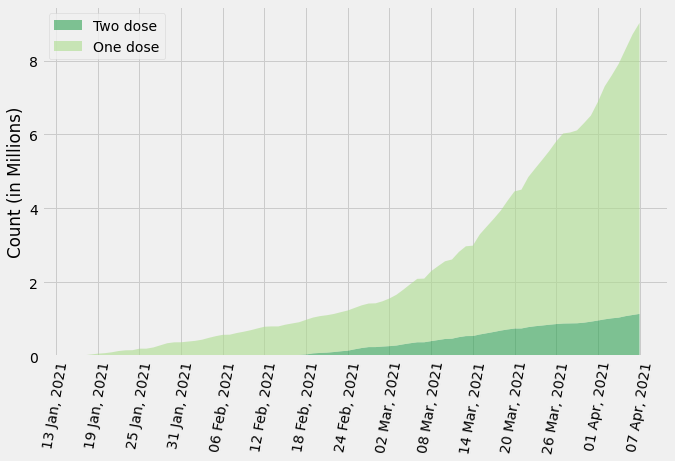

In [36]:
plt.figure(figsize=(10,6))
plt.stackplot(ind_vac_df.index, ppl_two_dose, ppl_one_dose, labels=['Two dose','One dose'],colors=['#31a354','#addd8e'], alpha=.6)

plt.legend(loc='upper left')
plt.ylabel('Count (in Millions)')

plt.xticks(ind_vac_df.index ,rotation=80)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(18))
# plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

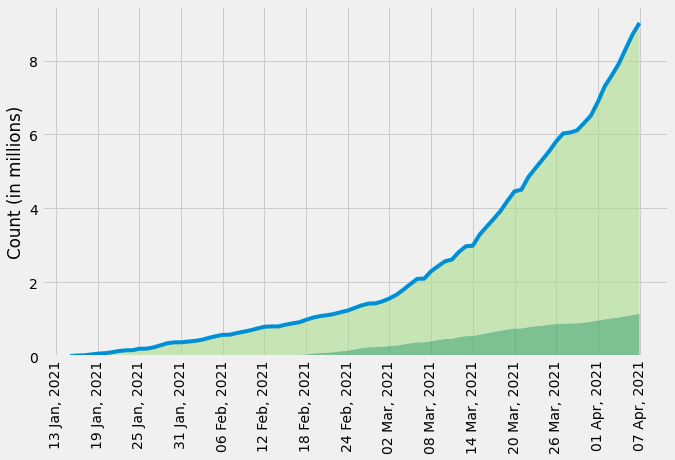

In [37]:
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)

ax1 = ax.twiny()
ax.stackplot(ind_vac_df.index, ppl_two_dose, ppl_one_dose, labels=['Two dose','One dose'],colors=['#31a354','#addd8e'], alpha=.6)
ax.set_ylabel('Count (in millions)')

ax.set_xticks(ind_vac_df.index)
ax.xaxis.set_major_locator(plt.MaxNLocator(18))
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
date_format = mpl_dates.DateFormatter('%d %b, %Y')
ax.xaxis.set_major_formatter(date_format)

ax1.plot(ind_vac_df.index, ind_vac_df['total_vaccinations']/10**7)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

In [38]:
per_one_dose = ind_vac_df['%_people_vaccinated_only_1st_dose']
per_two_dose = ind_vac_df['%_people_fully_vaccinated']

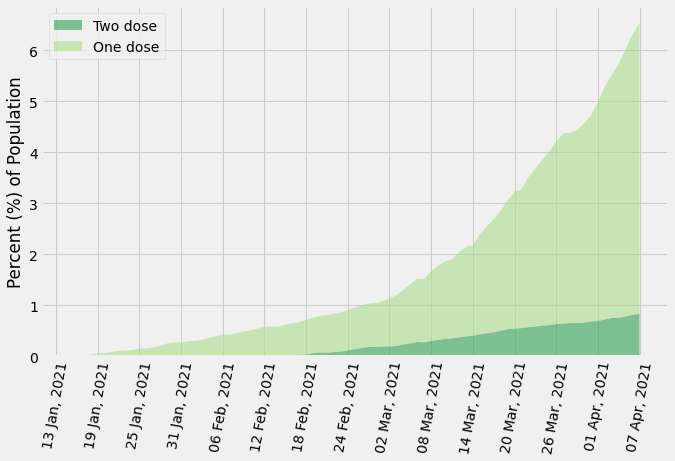

In [39]:
plt.figure(figsize=(10,6))
plt.stackplot(ind_vac_df.index, per_two_dose, per_one_dose, labels=['Two dose','One dose'],colors=['#31a354','#addd8e'], alpha=.6)

plt.legend(loc='upper left')
plt.ylabel('Percent (%) of Population')

plt.xticks(ind_vac_df.index ,rotation=80)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(18))
# plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

`Above graph shows what share of population has got first dose and second dose of Vaccine`

In [40]:
total_pop_vaccinated = ind_vac_df.max().get('%_people_vaccinated')

In [41]:
total_pop_vaccinated

6.54

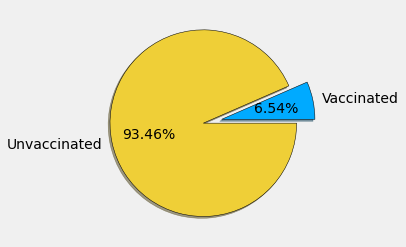

In [42]:
slices = [total_pop_vaccinated, 100-total_pop_vaccinated]
colors = ['#00aaff', '#efcf37']
labels = ['Vaccinated','Unvaccinated']
plt.pie(slices, colors=colors, labels=labels,
        wedgeprops={'edgecolor':'black'}, shadow=True, explode=(0.2,0),  autopct='%.2f%%')
plt.show()

### Vaccine V/s Virus

    How is infection spreading after vaccination?

In [43]:
ind_vac_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83 entries, 2021-01-15 to 2021-04-07
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   total_vaccinations                 83 non-null     int64  
 1   people_vaccinated_only_1st_dose    83 non-null     int64  
 2   people_fully_vaccinated            83 non-null     int64  
 3   daily_vaccinations                 83 non-null     int64  
 4   daily_vaccinations_avgd            83 non-null     int64  
 5   %_people_vaccinated                83 non-null     float64
 6   %_people_vaccinated_only_1st_dose  83 non-null     float64
 7   %_people_fully_vaccinated          83 non-null     float64
 8   vaccines                           83 non-null     object 
dtypes: float64(3), int64(5), object(1)
memory usage: 6.5+ KB


In [44]:
vir_vac_df = pd.concat([ind_covid_df, ind_vac_df], axis=1).dropna()
vir_vac_df

new_cases  new_deaths  total_cases  total_deaths  \
date                                                           
2021-01-15      15158         175     10542841        152093   
2021-01-16      15144         181     10557985        152274   
2021-01-17      13788         145     10571773        152419   
2021-01-18      10050         137     10581823        152556   
2021-01-19      13816         162     10595639        152718   
2021-01-20      15244         151     10610883        152869   
2021-01-21      14545         163     10625428        153032   
2021-01-22      14256         152     10639684        153184   
2021-01-23      14849         155     10654533        153339   
2021-01-24      13203         131     10667736        153470   
2021-01-25       9102         117     10676838        153587   
2021-01-26      12689         137     10689527        153724   
2021-01-27      11666         123     10701193        153847   
2021-01-28      18855         163     10720048        154010   
2021-01-29      13082         137     10733130        154147   
2021-01-30      13044         127     10746174        154274   
2021-01-31      11436         118     10757610        154392   
2021-02-01       8635          94     10766245        154486   
2021-02-02      11039         110     10777284        154596   
2021-02-03      12899         107     10790183        154703   
2021-02-04      12408         120     10802591        154823   
2021-02-05      11713          95     10814304        154918   
2021-02-06      12059          78     10826363        154996   
2021-02-07      11831          84     10838194        155080   
2021-02-08       9110          78     10847304        155158   
2021-02-09      11067          94     10858371        155252   
2021-02-10      12923         108     10871294        155360   
2021-02-11       9309          87     10880603        155447   
2021-02-12      12143         103     10892746        155550   
2021-02-13      12194          92     10904940        155642   
2021-02-14      11649          90     10916589        155732   
2021-02-15       9121          81     10925710        155813   
2021-02-16      11610         100     10937320        155913   
2021-02-17      12881         101     10950201        156014   
2021-02-18      13193          97     10963394        156111   
2021-02-19      13993         101     10977387        156212   
2021-02-20      14264          90     10991651        156302   
2021-02-21      14199          83     11005850        156385   
2021-02-22      10584          78     11016434        156463   
2021-02-23      13742         104     11030176        156567   
2021-02-24      16738         138     11046914        156705   
2021-02-25      16577         120     11063491        156825   
2021-02-26      16488         113     11079979        156938   
2021-02-27      16752         113     11096731        157051   
2021-02-28      15510         106     11112241        157157   
2021-03-01      12286          91     11124527        157248   
2021-03-02      14989          98     11139516        157346   
2021-03-03      17407          89     11156923        157435   
2021-03-04      16838         113     11173761        157548   
2021-03-05      18284         108     11192045        157656   
2021-03-06      18754         100     11210799        157756   
2021-03-07      18599          97     11229398        157853   
2021-03-08      15388          77     11244786        157930   
2021-03-09      17921         133     11262707        158063   
2021-03-10      22854         126     11285561        158189   
2021-03-11      23285         117     11308846        158306   
2021-03-12      24882         140     11333728        158446   
2021-03-13      25320         161     11359048        158607   
2021-03-14      26291         118     11385339        158725   
2021-03-15      24492         131     11409831        158856   
2021-03-16      28903         188     114387

In [45]:
vir_vs_vac = vir_vac_df[['new_cases','daily_vaccinations']]
vir_vs_vac

new_cases  daily_vaccinations
date                                     
2021-01-15      15158                 0.0
2021-01-16      15144            191181.0
2021-01-17      13788             33120.0
2021-01-18      10050            229748.0
2021-01-19      13816            220786.0
2021-01-20      15244            131649.0
2021-01-21      14545            237050.0
2021-01-22      14256            347058.0
2021-01-23      14849            191609.0
2021-01-24      13203             33303.0
2021-01-25       9102            408305.0
2021-01-26      12689              5671.0
2021-01-27      11666            326499.0
2021-01-28      18855            572074.0
2021-01-29      13082            571974.0
2021-01-30      13044            244307.0
2021-01-31      11436             14509.0
2021-02-01       8635            191313.0
2021-02-02      11039            188762.0
2021-02-03      12899            310634.0
2021-02-04      12408            509893.0
2021-02-05      11713            457404.0
2021-02-06      12059            358473.0
2021-02-07      11831             37040.0
2021-02-08       9110            446646.0
2021-02-09      11067            352553.0
2021-02-10      12923            405553.0
2021-02-11       9309            487896.0
2021-02-12      12143            462637.0
2021-02-13      12194             84807.0
2021-02-14      11649                 0.0
2021-02-15       9121                 0.0
2021-02-16      11610            340570.0
2021-02-17      12881            329416.0
2021-02-18      13193            659766.0
2021-02-19      13993            603419.0
2021-02-20      14264            388381.0
2021-02-21      14199            246850.0
2021-02-22      10584            338921.0
2021-02-23      13742            483298.0
2021-02-24      16738            459241.0
2021-02-25      16577            700414.0
2021-02-26      16488            689893.0
2021-02-27      16752            485607.0
2021-02-28      15510             58719.0
2021-03-01      12286            552870.0
2021-03-02      14989            766613.0
2021-03-03      17407            995299.0
2021-03-04      16838           1389455.0
2021-03-05      18284           1492201.0
2021-03-06      18754           1424640.0
2021-03-07      18599             66666.0
2021-03-08      15388           2019723.0
2021-03-09      17921           1359173.0
2021-03-10      22854           1317105.0
2021-03-11      23285            479909.0
2021-03-12      24882           2053537.0
2021-03-13      25320           1519952.0
2021-03-14      26291            169629.0
2021-03-15      24492           3039394.0
2021-03-16      28903           2117104.0
2021-03-17      35871           2078719.0
2021-03-18      39726           2196562.0
2021-03-19      40953           2723575.0
2021-03-20      43846           2540449.0
2021-03-21      46951            462157.0
2021-03-22      40715           3428596.0
2021-03-23      47262           2346692.0
2021-03-24      53476           2304423.0
2021-03-25      59118           2358731.0
2021-03-26      62258           2605333.0
2021-03-27      62714           2160009.0
2021-03-28      68020            260653.0
2021-03-29      56211            582919.0
2021-03-30      53480           1940999.0
2021-03-31      72330           2063543.0
2021-04-01      81466           3671242.0
2021-04-02      89129           4265157.0
2021-04-03      93249           2925356.0
2021-04-04     103558           3125512.0
2021-04-05      96982           4005763.0
2021-04-06     115736           3966548.0
2021-04-07     126789           3121199.0

In [46]:
print('Average daily vaccination of India is ', vir_vac_df['daily_vaccinations_avgd'].median())

Average daily vaccination of India is  459442.0


In [47]:
vir_vs_vac['daily_vaccinations']

date
2021-01-15          0.0
2021-01-16     191181.0
2021-01-17      33120.0
2021-01-18     229748.0
2021-01-19     220786.0
2021-01-20     131649.0
2021-01-21     237050.0
2021-01-22     347058.0
2021-01-23     191609.0
2021-01-24      33303.0
2021-01-25     408305.0
2021-01-26       5671.0
2021-01-27     326499.0
2021-01-28     572074.0
2021-01-29     571974.0
2021-01-30     244307.0
2021-01-31      14509.0
2021-02-01     191313.0
2021-02-02     188762.0
2021-02-03     310634.0
2021-02-04     509893.0
2021-02-05     457404.0
2021-02-06     358473.0
2021-02-07      37040.0
2021-02-08     446646.0
2021-02-09     352553.0
2021-02-10     405553.0
2021-02-11     487896.0
2021-02-12     462637.0
2021-02-13      84807.0
2021-02-14          0.0
2021-02-15          0.0
2021-02-16     340570.0
2021-02-17     329416.0
2021-02-18     659766.0
2021-02-19     603419.0
2021-02-20     388381.0
2021-02-21     246850.0
2021-02-22     338921.0
2021-02-23     483298.0
2021-02-24     459241.0
2021-02-25 

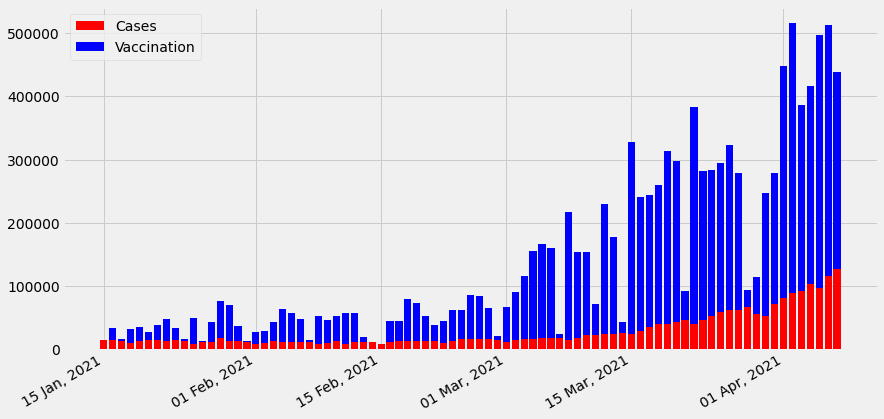

In [52]:
fig, ax = plt.subplots(figsize=(13,7))
ax.bar(vir_vs_vac.index, vir_vs_vac['new_cases'], color='red', label='Cases')
ax.bar(vir_vs_vac.index, vir_vs_vac['daily_vaccinations']/10, bottom=vir_vs_vac['new_cases'],color='blue', label='Vaccination')

fig.autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
ax.xaxis.set_major_formatter(date_format)

ax.legend()